# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [323]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [327]:
#A) seu código aqui
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [329]:
df['Income'] = df['Income'].str.replace('.', '', regex=False)
df['Income'] = df['Income'].str.replace(',', '.', regex=False)
df['Income'] = df['Income'].astype(float)

# df['Age'] = df['Age'].str.replace('.', '', regex=False)
#df['Age'] = df['Age'].astype(int)

df.dtypes

Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [332]:
#seu código aqui
df.isnull().values.any()

True

In [334]:
df.isnull().sum()

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

In [336]:
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [338]:
df['Age'].mean()

37.50769230769231

In [340]:
df['Age'].median()

36.0

In [342]:
df.fillna({'Age': df['Age'].median()}, inplace=True)
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [344]:
# Decidi substituir os valores nulos das idades pela mediana, pelo fato dos dados faltantes corresponderem a 20% do total, ficariam faltando muitos dados se excluíssemos. E também escolhi substituir pela mediana pelo valor estar muito próximo da média.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [347]:
#seu código aqui
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [349]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [351]:
df['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [353]:
df['Home Ownership'].unique()

array(['Rented', 'Owned'], dtype=object)

In [355]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [358]:
#seu código aqui
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


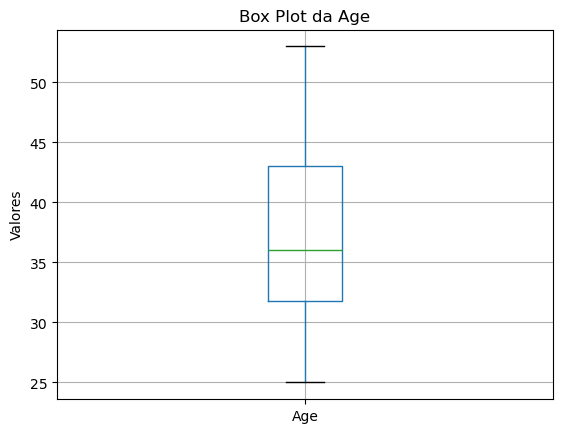

In [360]:
df.boxplot(column='Age')
plt.title('Box Plot da Age')
plt.ylabel('Valores')
plt.show()

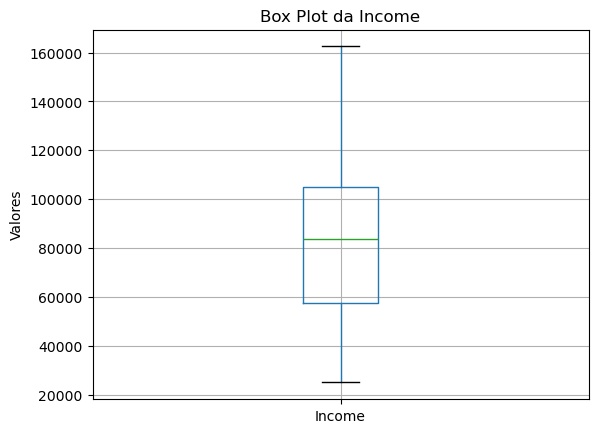

In [361]:
df.boxplot(column='Income')
plt.title('Box Plot da Income')
plt.ylabel('Valores')
plt.show()

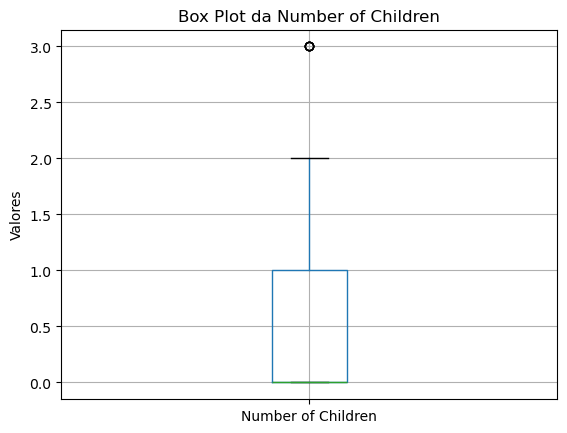

In [362]:
df.boxplot(column='Number of Children')
plt.title('Box Plot da Number of Children')
plt.ylabel('Valores')
plt.show()

In [363]:
# Nenhum outlier foi encontrado em nenhuma das variáveis numéricas, o único que aparenta ser um outlier é o número de filhos, mas não é, porque o valor mínimo e máximo estão muito próximos.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

C:\Users\dudir\AppData\Local\Temp\ipykernel_41592\1443239964.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



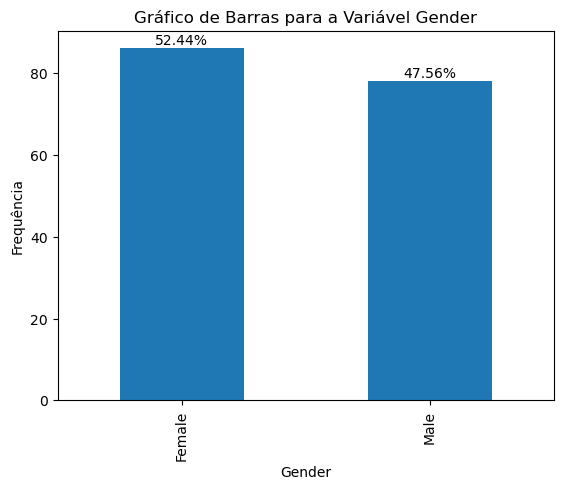

In [366]:
#seu código aqui
contagem_gender = df['Gender'].value_counts()
porcentagem_gender = (contagem_gender / contagem_gender.sum()) * 100

ax = contagem_gender.plot(kind='bar')


for i, v in enumerate(contagem_gender):
    ax.text(i, v + 1, f'{porcentagem_gender[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Gender')
plt.xlabel('Gender')
plt.ylabel('Frequência')

plt.show()

C:\Users\dudir\AppData\Local\Temp\ipykernel_41592\983994177.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



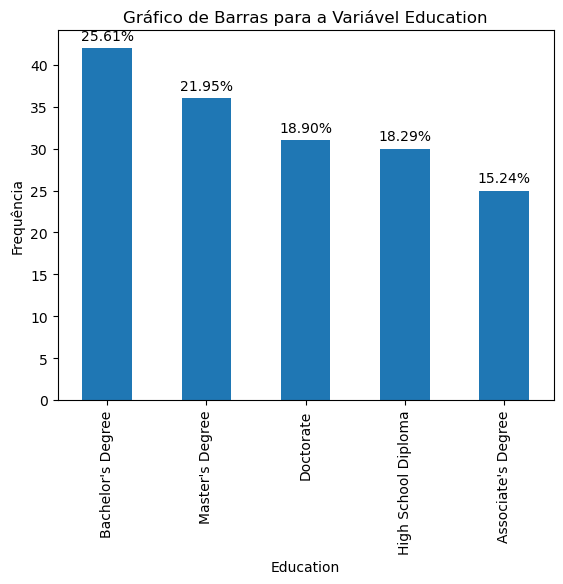

In [367]:
contagem_education = df['Education'].value_counts()
porcentagem_education = (contagem_education / contagem_education.sum()) * 100

ax = contagem_education.plot(kind='bar')


for i, v in enumerate(contagem_education):
    ax.text(i, v + 1, f'{porcentagem_education[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Education')
plt.xlabel('Education')
plt.ylabel('Frequência')

plt.show()

C:\Users\dudir\AppData\Local\Temp\ipykernel_41592\2652667546.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



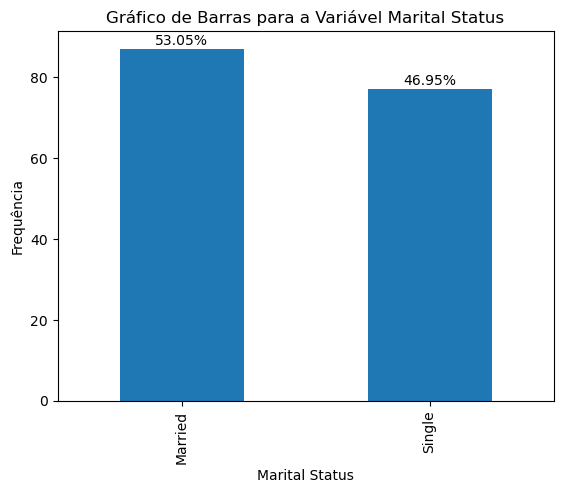

In [369]:
contagem_marital_status = df['Marital Status'].value_counts()
porcentagem_marital_status = (contagem_marital_status / contagem_marital_status.sum()) * 100

ax = contagem_marital_status.plot(kind='bar')


for i, v in enumerate(contagem_marital_status):
    ax.text(i, v + 1, f'{porcentagem_marital_status[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequência')

plt.show()

C:\Users\dudir\AppData\Local\Temp\ipykernel_41592\3221924643.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



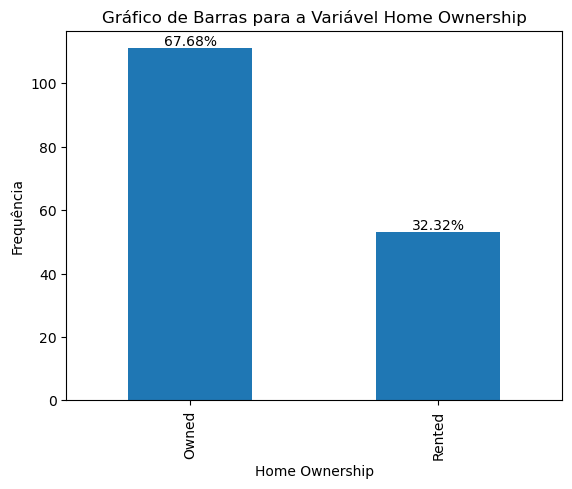

In [370]:
contagem_home_ownership = df['Home Ownership'].value_counts()
porcentagem_home_ownership = (contagem_home_ownership / contagem_home_ownership.sum()) * 100

ax = contagem_home_ownership.plot(kind='bar')


for i, v in enumerate(contagem_home_ownership):
    ax.text(i, v + 1, f'{porcentagem_home_ownership[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequência')

plt.show()

C:\Users\dudir\AppData\Local\Temp\ipykernel_41592\1478508834.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



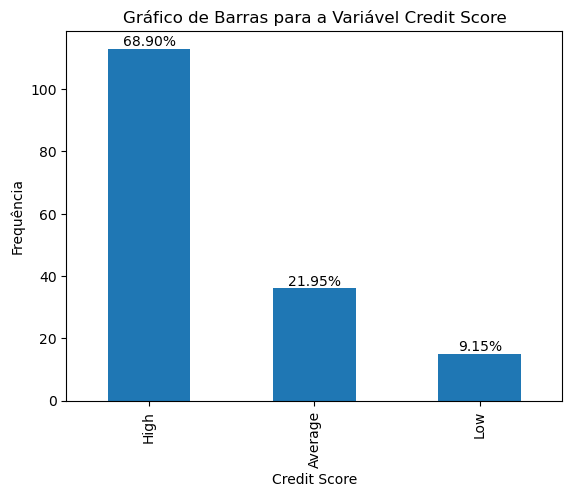

In [373]:
contagem_credit_score = df['Credit Score'].value_counts()
porcentagem_credit_score = (contagem_credit_score / contagem_credit_score.sum()) * 100

ax = contagem_credit_score.plot(kind='bar')


for i, v in enumerate(contagem_credit_score):
    ax.text(i, v + 1, f'{porcentagem_credit_score[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')

plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [375]:
#seu código aqui
# Não foram encontrados outliers, todos os gráficos estão bem equilibrados.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [378]:
#seu código aqui
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [380]:
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack')

fig.update_layout(title='Relação entre Age e Marital Status',
                  xaxis_title='Age',
                  yaxis_title='Contagem',
                  legend_title='Marital Status')
fig.show()

In [381]:
fig = px.histogram(df, x='Education', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Education e Credit Score',
                  xaxis_title='Education',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

In [383]:
media_income_por_age = df.groupby('Age')['Income'].mean().reset_index()

fig = px.line(media_income_por_age, x='Age', y='Income',
              title='Relação entre Age e Média de Income',
              labels={'Age': 'Age', 'Income': 'Média de Income'})

fig.show()

In [384]:
media_income_por_credit_score = df.groupby('Credit Score')['Income'].median().reset_index()
fig = px.bar(media_income_por_credit_score, x='Credit Score', y='Income',
             title='Média Income por Credit Score')
fig.show()

In [385]:
fig = px.histogram(df, x='Home Ownership', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Home Ownership e Credit Score',
                  xaxis_title='Home Ownership',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

In [387]:
# Insights que podemos retirar:

# Pessoas mais velhas tendem a estarem casadas mais que as mais novas.
# Pessoas com um nível de escolaridade maior tendem a ter um credit score maior.
# Existe uma relação equilibrada entre o salário e a idade, quanto maior a idade, mais sobe o salário.
# Quanto maior o sálario, maior o credit score também.
# Aqui existe a maior disparidade, pessoas que possuem casa própria tendem muito a terem um credit score bem alto, enquanto pessoas que moram de aluguel, raramente possuem um credit score alto.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [391]:
# seu código aqui
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [393]:
df_grouped = df.groupby(['Number of Children', 'Credit Score']).size().reset_index(name='count')
total_por_noc = df_grouped.groupby('Number of Children')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_noc) * 100


fig = px.bar(df_grouped, x='Number of Children', y='percent', color='Credit Score', barmode='stack',
             labels={'Number of Children': 'Number of Children', 'percent': 'Porcentagem', 'Credit Score': 'Credit Score'})

fig.update_layout(title='Relação entre Number of Children e Credit Score',
                  yaxis_title='Porcentagem',
                  legend_title='Credit Score')
fig.show()

In [395]:
df_grouped = df.groupby(['Gender', 'Credit Score']).size().reset_index(name='count')
total_por_gender = df_grouped.groupby('Gender')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_gender) * 100


fig = px.bar(df_grouped, x='Gender', y='percent', color='Credit Score', barmode='stack',
             labels={'Gender': 'Gender', 'percent': 'Porcentagem', 'Credit Score': 'Credit Score'})

fig.update_layout(title='Relação entre Gender e Credit Score',
                  yaxis_title='Porcentagem',
                  legend_title='Credit Score')
fig.show()

In [397]:
fig = px.histogram(df, x='Age', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Age e Credit Score',
                  xaxis_title='Age',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

In [399]:
# Podemos perceber por esses gráficos também que:

# O número de filhos está bem relacionado com o credit score, pessoas com mais filhos costumam ter credit score alto, pessoas sem nenhum filho, na grande maioria, entre médio e baixo.
# Existe também uma pequena diferença entre homens e mulheres quando se trata de credit score, homens costumam tê-los mais altos.
# Assim como na idade, quanto mais idade a pessoa possui, maior costuma ser o credit score, inclusive com as pessoas de 38 anos pra mais tendo exlusivamente, sem exceções, credit score alto.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [404]:
#seu código aqui
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [406]:
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number of Children,0.072432,0.084547,1.000000


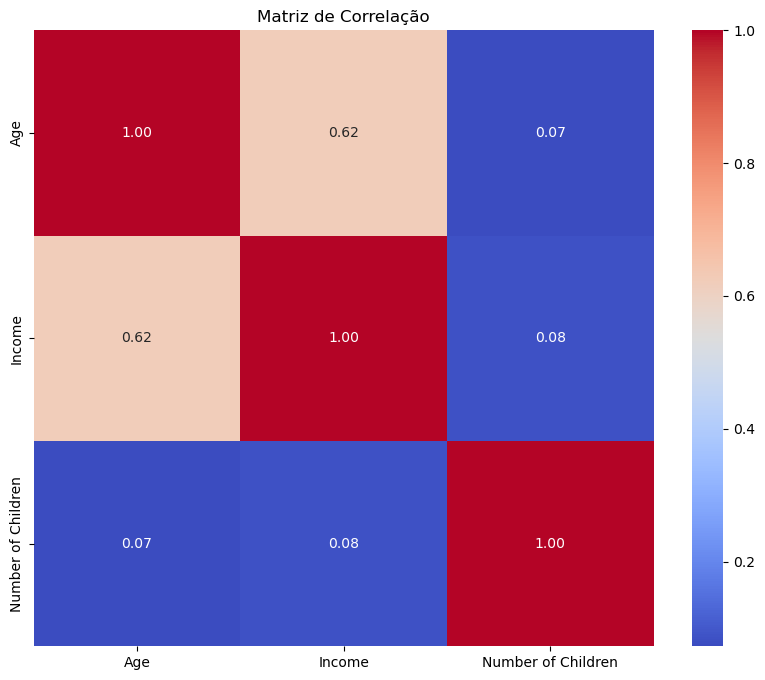

In [408]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [415]:
# sua justificativa aqui
# As variáveis de salário e idade têm uma grande correlação, enquanto a de número de filhos tanto em relação a idade quanto a salário, não têm grande correlação. Me faz sentido essa correlação, porque o salário está diretamente relacionado com a idade, quanto maior a idade, maior o salário.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [419]:
#seu código aqui
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [421]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

df['Education_encoded'] = label_encoder.fit_transform(df['Education'])

df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])

df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership'])

df['Credit Score'] = label_encoder.fit_transform(df['Credit Score'])

df.drop(columns=['Gender'], inplace=True)

df.drop(columns=['Education'], inplace=True)

print(df)

      Age    Income  Marital Status  Number of Children  Home Ownership  \
0    25.0   50000.0               1                   0               1   
1    30.0  100000.0               0                   2               0   
2    35.0   75000.0               0                   1               0   
3    40.0  125000.0               1                   0               0   
4    45.0  100000.0               0                   3               0   
..    ...       ...             ...                 ...             ...   
159  29.0   27500.0               1                   0               1   
160  34.0   47500.0               1                   0               1   
161  39.0   62500.0               0                   2               0   
162  44.0   87500.0               1                   0               0   
163  49.0   77500.0               0                   1               0   

     Credit Score  Gender_encoded  Education_encoded  
0               1               0           

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [423]:
#seu código aqui
df.select_dtypes(include=['number']).corr()

,Age,Income,Marital Status,Number of Children,Home Ownership,Credit Score,Gender_encoded,Education_encoded
Age,1.000000,0.621492,-0.449115,0.072432,-0.628042,0.218494,0.204661,0.171525
Income,0.621492,1.000000,-0.471004,0.084547,-0.704928,0.083698,0.495738,0.369449
Marital Status,-0.449115,-0.471004,1.000000,-0.696984,0.708374,-0.205756,0.278362,-0.067797
Number of Children,0.072432,0.084547,-0.696984,1.000000,-0.497129,0.136517,-0.442139,0.047311
Home Ownership,-0.628042,-0.704928,0.708374,-0.497129,1.000000,-0.293384,-0.031519,-0.397043
Credit Score,0.218494,0.083698,-0.205756,0.136517,-0.293384,1.000000,-0.247729,0.334424
Gender_encoded,0.204661,0.495738,0.278362,-0.442139,-0.031519,-0.247729,1.000000,0.248671
Education_encoded,0.171525,0.369449,-0.067797,0.047311,-0.397043,0.334424,0.248671,1.000000


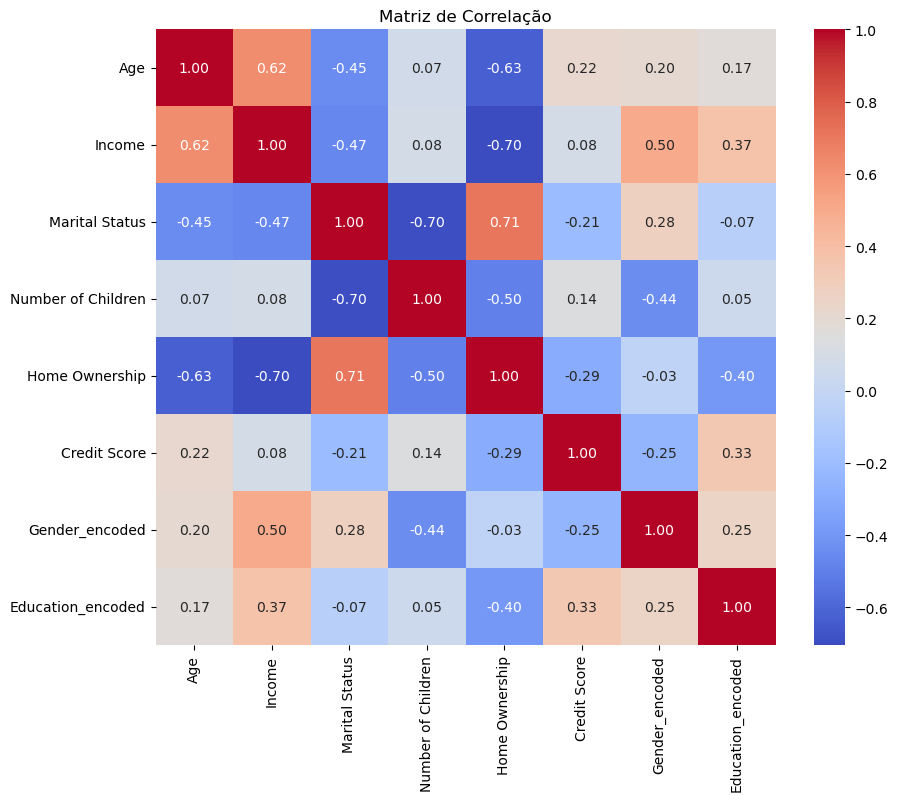

In [425]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

In [427]:
# As novas variáveis com maior correlação são as de Home Ownership e Marital Status, que faz sentido, pelo fato de pessoas casadas possuírem mais casas próprias. E também de Marital Status e Number of Children, com pessoas casadas possuindo mais filhos.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [430]:
#seu código aqui
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

In [432]:
from sklearn.model_selection import train_test_split

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [436]:
X_train

,Age,Income,Marital Status,Number of Children,Home Ownership,Gender_encoded,Education_encoded
84,36.0,125000.0,0,0,0,1,0
2,35.0,75000.0,0,1,0,0,2
94,30.0,117500.0,0,2,0,1,4
45,47.0,90000.0,0,1,0,0,2
42,32.0,57500.0,1,0,1,1,0
...,...,...,...,...,...,...,...
71,46.0,97500.0,0,1,0,0,3
106,32.0,57500.0,1,0,1,1,0
14,36.0,70000.0,0,2,0,0,1
92,36.0,85000.0,0,1,0,0,2


In [438]:
X_test

,Age,Income,Marital Status,Number of Children,Home Ownership,Gender_encoded,Education_encoded
135,25.0,55000.0,1,0,1,0,1
115,48.0,87500.0,0,1,0,0,2
131,26.0,55000.0,0,1,0,0,1
55,39.0,62500.0,0,2,0,0,1
95,35.0,90000.0,0,1,0,0,2
29,25.0,55000.0,1,0,1,0,1
157,48.0,82500.0,0,1,0,0,2
51,48.0,82500.0,0,1,0,0,2
101,36.0,95000.0,0,2,0,0,4
145,36.0,95000.0,0,1,0,0,3


In [440]:
y_train

84     1
2      1
94     1
45     1
42     0
      ..
71     1
106    0
14     1
92     1
102    1
Name: Credit Score, Length: 131, dtype: int32

In [442]:
y_test

135    0
115    1
131    0
55     1
95     1
29     0
157    1
51     1
101    1
145    1
19     0
85     2
15     1
66     1
24     2
30     1
132    1
105    2
152    1
16     1
75     1
18     2
12     2
9      1
31     1
155    1
98     1
56     1
134    1
160    0
139    1
78     1
60     1
Name: Credit Score, dtype: int32

**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

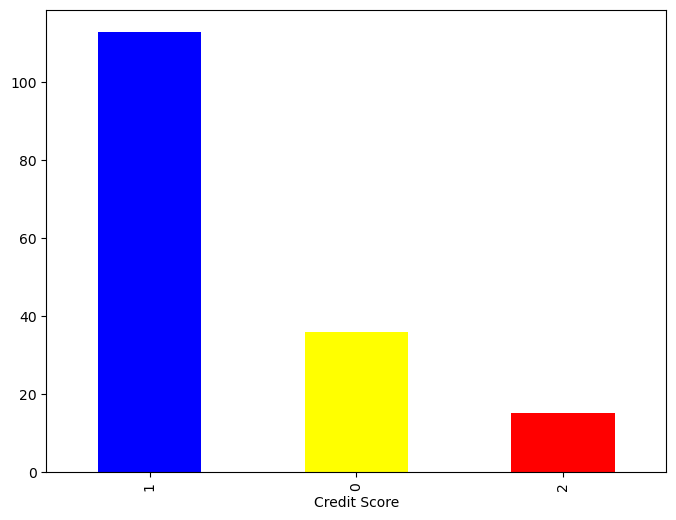

In [452]:
#seu código aqui
credit_score_counts = df['Credit Score'].value_counts()
plt.figure(figsize=(8, 6))
credit_score_counts.plot(kind='bar', color=['blue', 'yellow', 'red'])
plt.show()

In [454]:
print((df['Credit Score'].value_counts(normalize=True) * 100))

Credit Score
1    68.902439
0    21.951220
2     9.146341
Name: proportion, dtype: float64


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [456]:
#seu código aqui
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Credit Score
1    90
0    90
2    90
Name: count, dtype: int64
